In [2]:
!pip install statsmodels

In [1]:
import pandas as pd
data = pd.read_csv('./house_price_time_series.csv', encoding='cp949')
print(data.tail())
print(data.info())

    주택그룹코드 광역시도  시군구  가격지수_200301  가격지수_200302  가격지수_200303  가격지수_200304  \
213    아파트   서울  노원구         51.8         51.6         51.8         51.9   
214    아파트   서울  광진구         55.2         54.9         55.1         55.7   
215    아파트   서울  강북구         63.8         63.0         63.4         63.7   
216    아파트   서울   강북         55.2         55.0         55.4         55.6   
217    아파트   서울   전체         50.1         50.2         50.5         51.5   

     가격지수_200305  가격지수_200306  가격지수_200307  ...  가격지수_201912  가격지수_202001  \
213         52.3         52.2         52.1  ...        101.5        101.9   
214         57.1         57.5         57.5  ...        104.4        105.1   
215         63.9         64.0         64.0  ...        101.0        101.3   
216         56.2         56.3         56.3  ...        102.2        102.7   
217         52.8         53.2         53.6  ...        102.9        103.6   

     가격지수_202002  가격지수_202003  가격지수_202004  가격지수_202005  가격지수_202006  \
213     

In [13]:
seoul_price = pd.DataFrame({ 'price': data.loc[216] });
seoul_price = seoul_price[3:]
seoul_price.fillna(method='pad')

print(seoul_price.describe())
print(seoul_price.info())

        price
count   213.0
unique  143.0
top      82.0
freq      7.0
<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 가격지수_200301 to 가격지수_202009
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   price   213 non-null    object
dtypes: object(1)
memory usage: 3.3+ KB
None


In [14]:
seoul_price.head()

,price
가격지수_200301,55.2
가격지수_200302,55.0
가격지수_200303,55.4
가격지수_200304,55.6
가격지수_200305,56.2


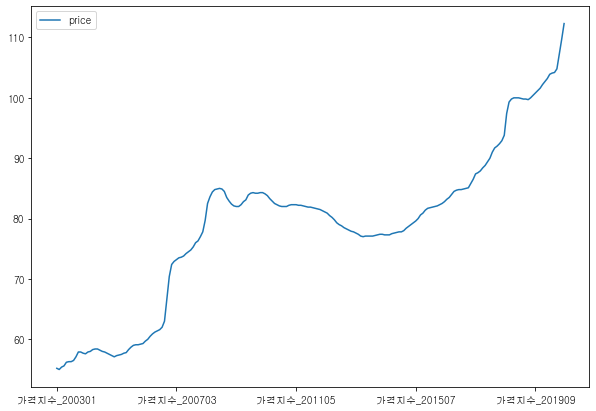

In [5]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

seoul_price.plot(figsize=(10, 7))
plt.show()

In [30]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

seoul_data = map(int, seoul_price.values)
seoul_data = [x for x in seoul_data if np.isnan(x) == False]

model = ARIMA(seoul_data, order=(2, 1, 2))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  213
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -222.770
Date:                Thu, 23 Jun 2022   AIC                            455.540
Time:                        16:36:37   BIC                            472.322
Sample:                             0   HQIC                           462.323
                                - 213                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0754      0.228     -0.331      0.741      -0.522       0.371
ar.L2          0.7715      0.178      4.326      0.000       0.422       1.121
ma.L1          0.4446      0.212      2.099      0.0

<AxesSubplot:>

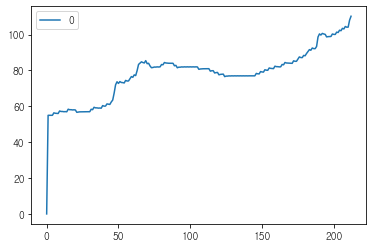

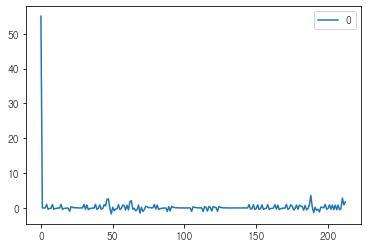

In [36]:
fig = pd.DataFrame(model_fit.predict())
fig.plot()

res = pd.DataFrame(model_fit.resid)
res.plot()